In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from natsort import natsorted
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.cm as cm
from pygam import LinearGAM, s, f
from scipy import stats
sns.set(font_scale=1.5, style="white")

In [2]:
regionname = pd.read_csv('../../Modules/humanschaefer400_regions.csv')
sarank = pd.read_csv('../../Modules/humanSensorimotor_Association_Axis_AverageRanks.csv')
sarank = pd.concat([regionname.reset_index(drop=True), sarank.reset_index(drop=True)],axis=1)
sarank = sarank.loc[:, ['name', 'finalrank.wholebrain']]

In [3]:
# project directory
data_dir = '../../Dataset/rna'
# read expression data
gene_columns = pd.read_csv(os.path.join(data_dir, 'columns_metadata.csv'))
gene_rows = pd.read_csv(os.path.join(data_dir, 'rows_metadata.csv'))
gene_columns['id'] = range(1, len(gene_columns) + 1)
expr_matrix = pd.read_csv(os.path.join(data_dir, 'expression_matrix.csv'), header=None)
expr_matrix = expr_matrix.iloc[:, 1:] 

In [4]:
# remove genes without an entrez id
expr_subset = expr_matrix[~gene_rows['entrez_id'].isna()]
rows_subset = gene_rows[~gene_rows['entrez_id'].isna()]

In [5]:
# log2 transform expression data and collapse duplicated transcripts
log2_expr = np.log2(expr_subset + 1)
log2_expr['entrez_id'] = rows_subset['entrez_id']

In [6]:
markers  = ['PVALB', 'SST','GAD1', 'GAD2', 'DLX1', 'DLX2'] #PVALB
for marker in markers:
    ids = gene_rows[gene_rows.gene_symbol==marker].entrez_id.values[0]
    df_marker = log2_expr[log2_expr.entrez_id==ids].iloc[:, :-1].T.values
    gene_columns[marker] = df_marker

In [7]:
sa_cortex = np.unique([x for x in gene_columns.structure_name if 'cortex' in x])
sa_cortex = pd.DataFrame([x for x in sa_cortex if 'cereb' not in x])
sa_cortex.columns = ['structure_name']

In [8]:
#adults = [ '18 yrs', '19 yrs', '21 yrs','23 yrs', '30 yrs', '36 yrs', '37 yrs', '40 yrs']
adults = [ '18 yrs', '19 yrs', '21 yrs','23 yrs']
cbpd_wide = ['3 yrs','4 yrs', '8 yrs', '11 yrs','13 yrs']

In [9]:
df = pd.read_csv('../../Dataset/rna/brodmann_schaefer_0.8.csv')

In [10]:
child_original = pd.read_csv('../../Derivatives/childhood/original.csv')
adult_original = pd.read_csv('../../Derivatives/adult/original.csv')

Visual = [x for x in df.columns if 'BA17' in x]
Auditory = [x for x in df.columns if 'BA41' in x]
Sensory =  [x for x in df.columns if 'BA1_3' in x] + [x for x in df.columns if 'BA2' in x] # [x for x in sarank.name.values if 'S2' in x] +
Motor = [x for x in df.columns if 'BA4' in x]
vPFC = [x for x in df.columns if 'BA44' in x] +  [x for x in df.columns if 'BA45' in x]
dPFC = [x for x in df.columns if 'BA8' in x] + [x for x in df.columns if 'BA9' in x] + [x for x in df.columns if 'BA46' in x]
OFC = [x for x in df.columns if 'BA11' in x] + [x for x in df.columns if 'BA12' in x]+ [x for x in df.columns if 'BA13' in x]  + [x for x in df.columns if 'BA14_' in x]
TEv = [x for x in df.columns if 'BA20' in x]
ACC = [x for x in df.columns if 'BA24' in x] + [x for x in df.columns if 'BA25' in x] + [x for x in df.columns if 'BA32' in x]
STC = [x for x in df.columns if 'BA22' in x]
IPC = [x for x in df.columns if 'BA39' in x] +  [x for x in df.columns if 'BA40' in x]

child_regions = []
adult_regions = []
sas = []
for x in [Sensory, Auditory, Motor, Visual, vPFC, dPFC, OFC, TEv, ACC, STC, IPC]:
    roi  = df.loc[:, x].sum(axis=1)>0
    child_original['roi']=roi
    adult_original['roi']=roi
    child_regions.append(child_original[child_original.roi==True].mean()['H'])
    adult_regions.append(adult_original[adult_original.roi==True].mean()['H'])
    sas.append(child_original[child_original.roi==True].mean()['SArank'])

In [11]:
child = pd.DataFrame([['Sensory', 'Auditory', 'Motor', 'Visual', 'vPFC', 'dPFC', 'OFC', 'TEv', 'ACC', 'STC', 'IPC'], child_regions, sas]).T.sort_values(2).reset_index(drop=True)
child.columns = ['region', 'H', 'sa']
adult = pd.DataFrame([['Sensory', 'Auditory', 'Motor', 'Visual', 'vPFC', 'dPFC', 'OFC', 'TEv', 'ACC', 'STC', 'IPC'], adult_regions, sas]).T.sort_values(2).reset_index(drop=True)
adult.columns = ['region', 'H', 'sa']

In [12]:
child['sa'] = [0,1,10,2,8,6,3,4,5,9,7]
adult['sa'] = [0,1,10,2,8,6,3,4,5,9,7]

In [13]:
brodmann = pd.read_csv('../../Dataset/rna/brodmann.csv')

In [14]:
#sa_cortex['sa'] = [5,10,9,-1,8,-1,2,6,1,4,-1,3,0,-1,7]
sa_cortex['sa'] = [10,7,9,-1,8,-1,5,4,1,3,-1,2,0,-1,6]
gene_columns = pd.merge(gene_columns, sa_cortex, on='structure_name', how='left')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


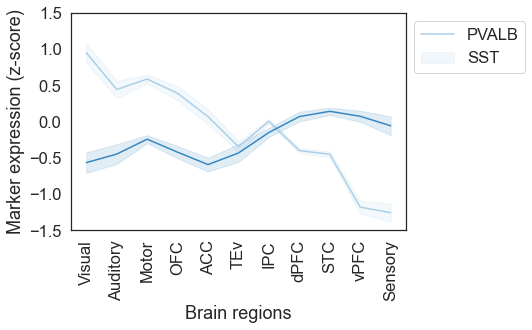

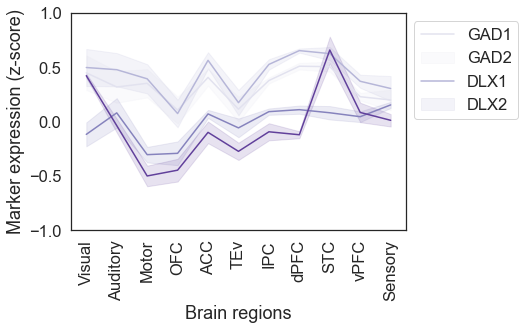

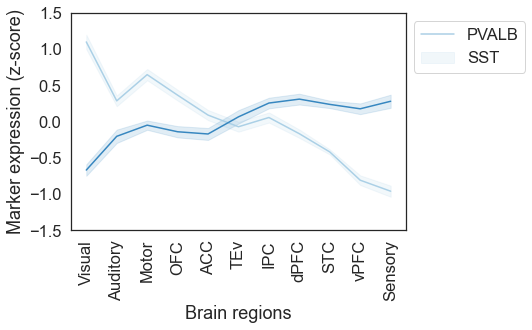

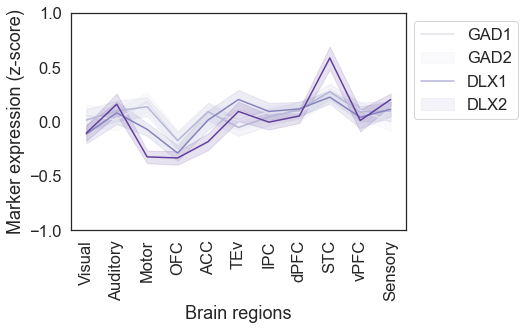

In [30]:
fignum = ['B', 'E', 'C', 'F']
j = 0
wide = gene_columns.loc[[x for x in gene_columns.index if gene_columns.loc[x,'age'] in adults+cbpd_wide], :]
wide = wide[wide.sa>-1].sort_values('sa')
wide = wide.groupby(['sa', 'donor_name']).mean().reset_index()
for x in ['PVALB', 'SST', 'GAD1', 'GAD2', 'DLX1', 'DLX2']:
    wide[x] = stats.zscore(wide[x])
wide = pd.merge(wide, gene_columns.loc[:, ['donor_id', 'age']], on='donor_id')
for age in [adults, cbpd_wide]:
    wide_age = wide.loc[[x for x in wide.index if wide.loc[x,'age'] in age], :]
    wide_mean = wide_age.groupby(['sa']).mean().reset_index()
    wide_std = wide_age.groupby(['sa']).sem().reset_index()
    colors = ['Blues', 'Purples', 'Greens']
    for k,sets in enumerate([[0,1],[2,3,4,5]]):
        if k==2:
            my_palette = {c: sns.color_palette(colors[k], n_colors=(len(sets)+1)).as_hex()[c+1] for c in np.arange(len(sets))}
        else:
            my_palette = {c: sns.color_palette(colors[k], n_colors=len(sets)).as_hex()[c] for c in np.arange(len(sets))}
        figure = plt.figure()
        for i, marker in enumerate([markers[x] for x in sets]):
            yerr = wide_std[marker]
            x = wide_mean['sa']
            y = wide_mean[marker]
            plt.plot(x, y,color=my_palette[i])
            plt.fill_between(x, y+yerr, y-yerr, alpha=0.15,color=my_palette[i]) 
        plt.xticks(x.values, child.sort_values('sa').region.values, rotation=90)
        plt.ylabel('Marker expression (z-score)')
        plt.xlabel('Brain regions')
        if k ==0:
            plt.ylim([-1.5, 1.5])
        else:
            plt.ylim([-1,1])
        plt.legend([markers[x] for x in sets], loc='upper left', bbox_to_anchor=(1, 1))
        plt.savefig('../figures/Fig1'+fignum[j]+'.eps',  format='eps', bbox_inches='tight')
        j +=1

In [19]:
age = pd.DataFrame(gene_columns.age.unique())
age['rank'] = np.arange(1,age.shape[0]+1)
age.columns = ['age', 'rank']
gene_columns = pd.merge(gene_columns, age, on='age', how='left')

In [20]:
adults = [ '18 yrs', '19 yrs', '21 yrs','23 yrs']
cbpd_wide = ['3 yrs','4 yrs', '8 yrs', '11 yrs','13 yrs']
cbpd_wide = cbpd_wide + adults

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


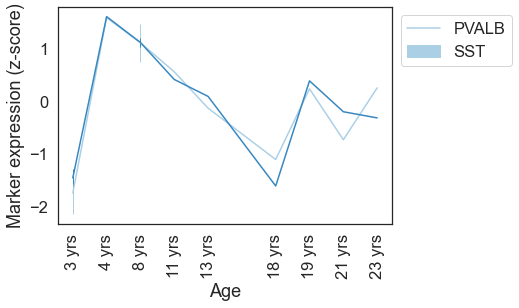

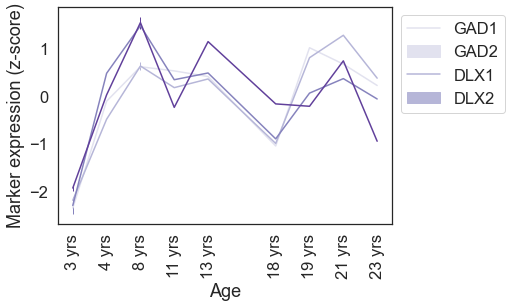

In [21]:
fignum = ['D', 'G']
colors = ['Blues', 'Purples']
for j,sets in enumerate([[0,1],[2,3,4,5]]):
    if j==2:
        my_palette = {c: sns.color_palette(colors[j], n_colors=(len(sets)+1)).as_hex()[c+1] for c in np.arange(len(sets))}
    else:
        my_palette = {c: sns.color_palette(colors[j], n_colors=len(sets)).as_hex()[c] for c in np.arange(len(sets))}
    figure = plt.figure()
    for i, marker in enumerate([markers[x] for x in sets]):
        wide = gene_columns.loc[[x for x in gene_columns.index if gene_columns.loc[x,'age'] in cbpd_wide], :]
        donor = wide.groupby(['donor_id']).mean().reset_index().sort_values('rank')
        donor = donor.groupby(['rank']).std().reset_index().sort_values('rank')
        wide = wide[wide.sa>-1]
        wide = wide.groupby(['age']).mean().reset_index().sort_values('rank')
        x = wide['rank'].values
        y = stats.zscore(wide[marker].values)
        yerr = donor[marker].values/np.sqrt(2)
        plt.plot(x,y , color=my_palette[i])
        plt.fill_between(x,y+yerr, y-yerr, color=my_palette[i])
        plt.xticks(wide['rank'].values, cbpd_wide, rotation=90)
        plt.ylabel('Marker expression (z-score)')
        plt.xlabel('Age')
    plt.legend([markers[x] for x in sets], loc='upper left', bbox_to_anchor=(1, 1))
    stats.f_oneway(wide.iloc[0, 5:9], wide.iloc[1, 5:9], wide.iloc[2, 5:9])
    plt.savefig('../figures/Fig1'+fignum[j]+'.eps',  format='eps', bbox_inches='tight')